In [14]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

1

In [153]:
def run_realization (nodes, p, epochs, initial_node = None):
    
    if initial_node == None:
        initial_node = random.randint(0, nodes-1)
    
    nodes = np.zeros(nodes)
    current_position = initial_node
    position_history = [current_position]
    
    nodes[current_position] += 1
    
    for epoch in np.arange(epochs-1):
        
        
        if current_position == 0:
            current_position += 1
        elif current_position == nodes.shape[0]-1:
            current_position -= 1           
        elif random.uniform(0, 1) <= p: 
            current_position += 1
        else:
            current_position -= 1
    
        nodes[current_position] += 1
        position_history.append(current_position)
        
    return np.array(position_history)

hist = run_realization(nodes=8, p=0.5, initial_node=None, epochs=10000)
hist

array([0.0006, 0.0007, 0.0006, ..., 0.0005, 0.0006, 0.0005])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


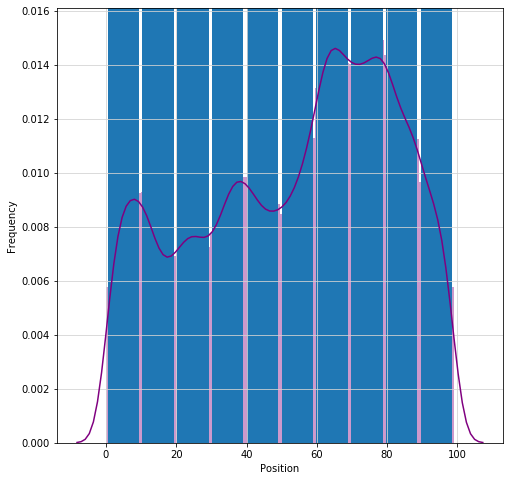

In [155]:
def plot_hist(nodes, p, initial_node, epochs):

    fig, ax = plt.subplots(figsize=(8,8))
    hist = run_realization(nodes=nodes, p=p, initial_node=initial_node, epochs=epochs)
    sns.distplot(hist, norm_hist=False, ax=ax, 
                 #kde=False, hist_kws=dict(alpha=.9),
                 color="purple")
    ax.hist(hist, rwidth=.9, bins=10)
    ax.grid(True, color='lightgray')
    ax.set_xlabel("Position"), ax.set_ylabel("Frequency")

plot_hist(nodes=100, p=.5, initial_node=None, epochs=100000)

- Para um $p = 0.5$, a influência do nó inicial na distribuição do número de visitas é maior quanto maior for o número de nós
- Em geral, quanto maior o $p$, mais pra "direita" fica a distribuição
- 

In [116]:
nodes = 10
p = 0.5
x_0 = 3
X = np.zeros(nodes)
epochs = 100
X[x_0] = 1

In [156]:
P = np.zeros([nodes, nodes])
for i in np.arange(nodes-1):   
    
    P[i+1][i] = p
    P[i][i+1] = 1-p
    
P[0][1] = 1
P[nodes-1][nodes-2] = 1
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

In [157]:
np.linalg.matrix_power(P, epochs+1)@X + np.linalg.matrix_power(P, epochs)@X

array([0.22263752, 0.22263752, 0.22254036, 0.2224432 , 0.22229434,
       0.22214548, 0.22201458, 0.22188367, 0.22183197, 0.22178028])